--------------------------FIRST 8 ROWS of DATASET--------------------------

         START_DATE          END_DATE  CATEGORY        START             STOP  MILES          PURPOSE
0  07-02-2016 13:55  07-02-2016 14:09  Business  Fort Pierce      Fort Pierce    5.1          Meeting
1  26-06-2016 20:48  26-06-2016 21:31  Business        Tampa      Fort Pierce   33.4  Errand/Supplies
2  25-06-2016 08:02  25-06-2016 08:35  Business    Kissimmee         Palm Bay   21.7          Meeting
3  17-04-2016 17:06  17-04-2016 18:42  Business    Kissimmee            Miami   32.2  Errand/Supplies
4  26-06-2016 16:21  26-06-2016 16:33  Business      Orlando            Miami    8.8          Meeting
5  17-04-2016 10:12  17-04-2016 11:26  Business        Miami          Orlando   35.5   Customer Visit
6  04-04-2016 07:38  04-04-2016 09:26  Personal  Fort Pierce            Tampa   77.2  Errand/Supplies
7  27-05-2016 14:08  27-05-2016 15:53  Personal     Palm Bay  West Palm Beach   63.6          Meeting


---

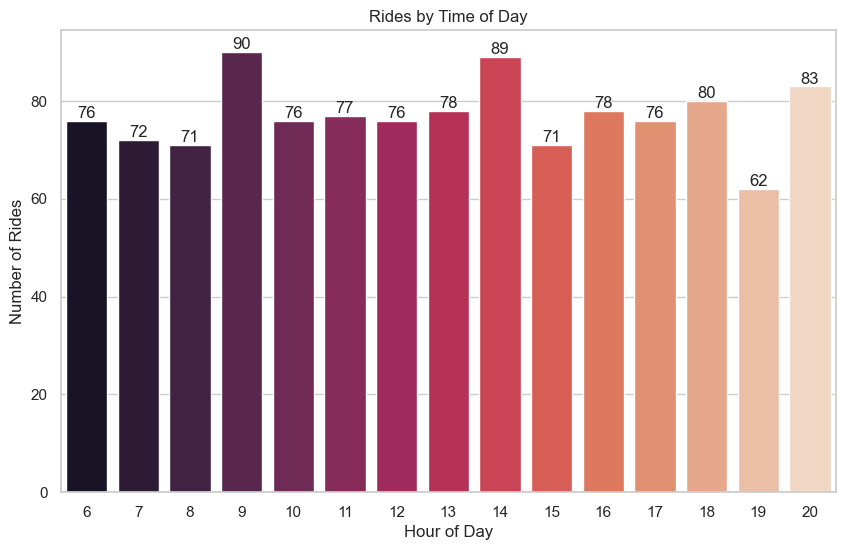

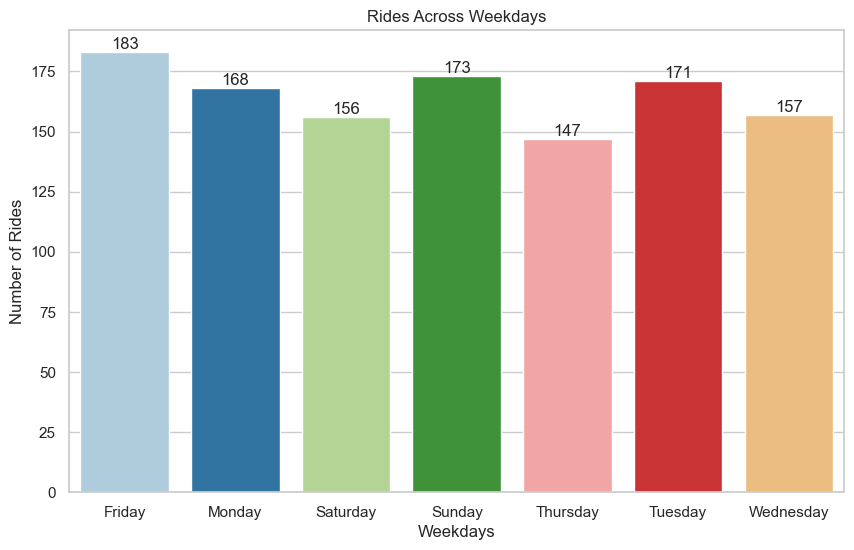

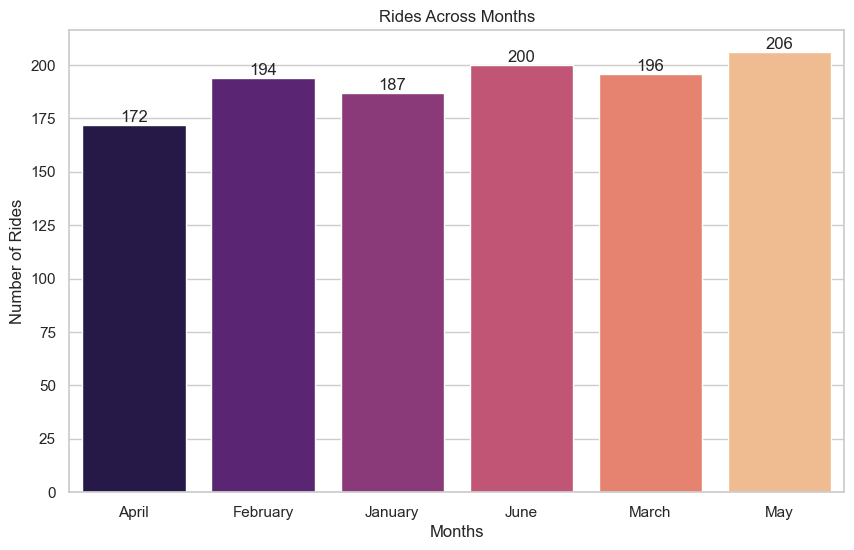



--------------------------COUNT PLOTS--------------------------


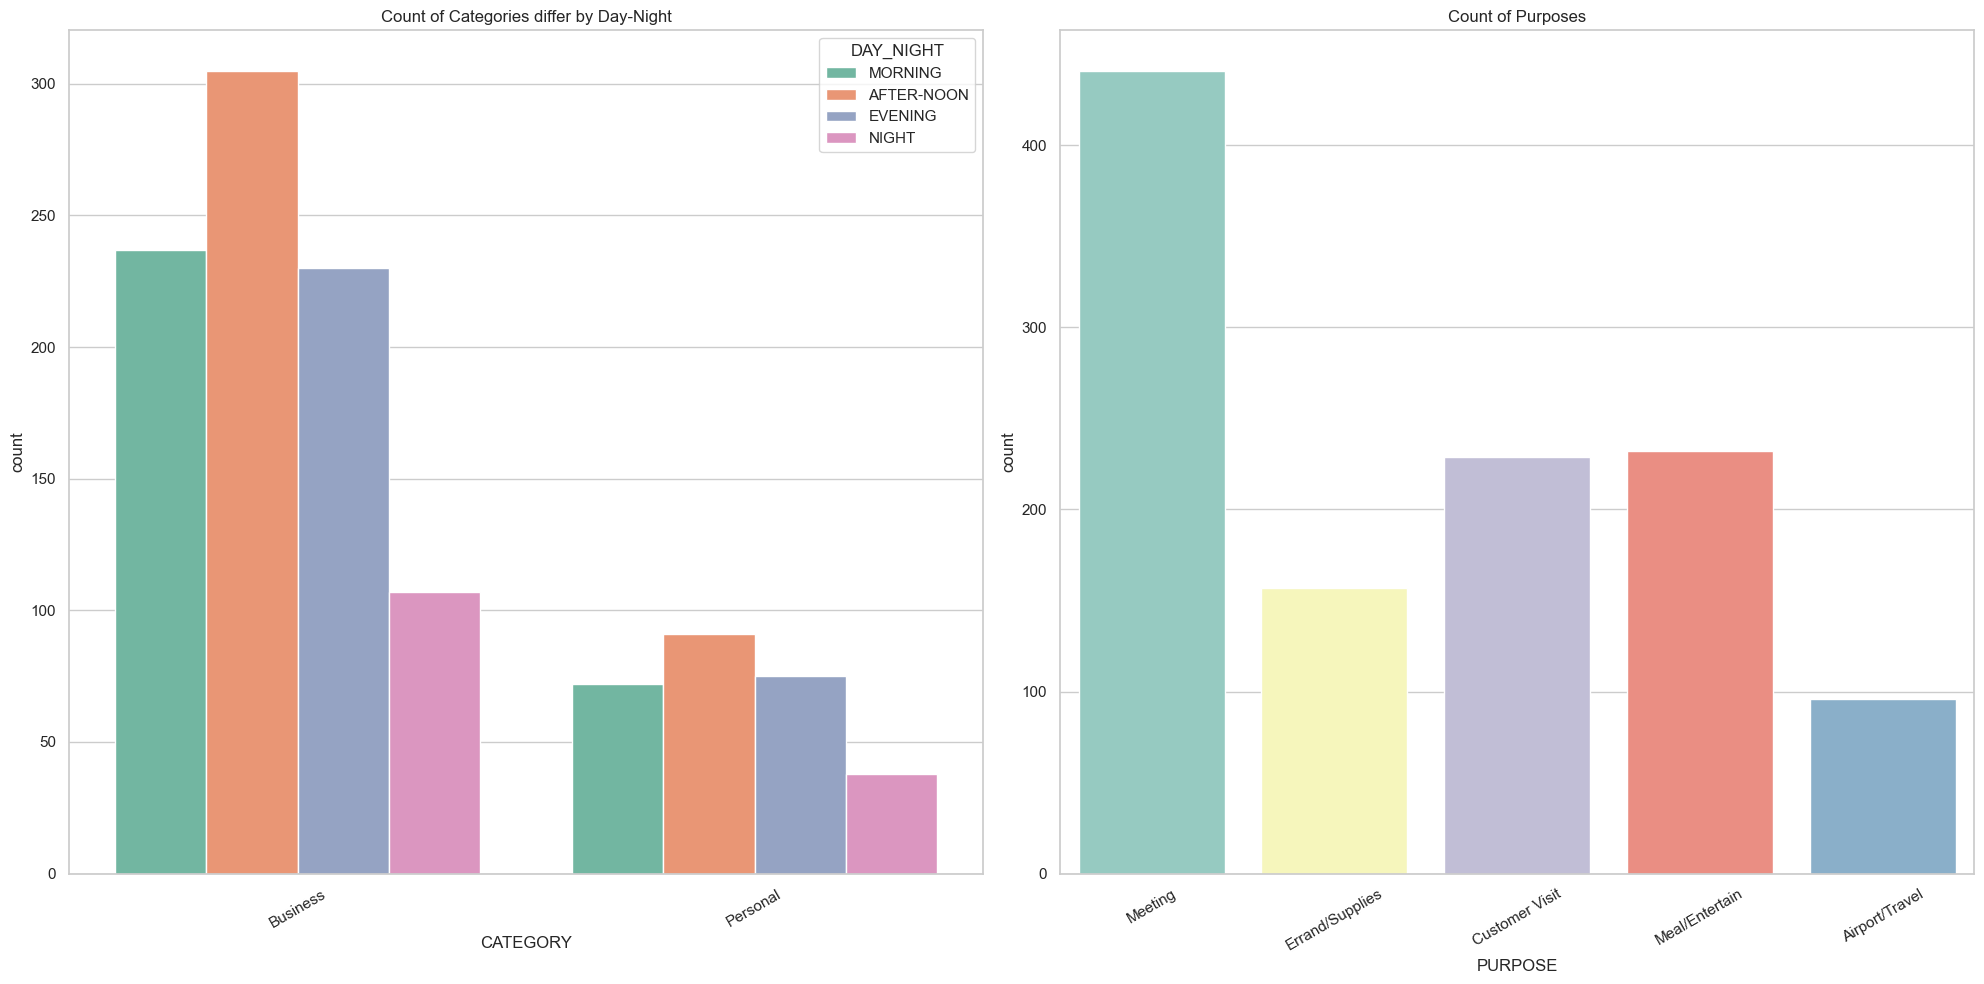

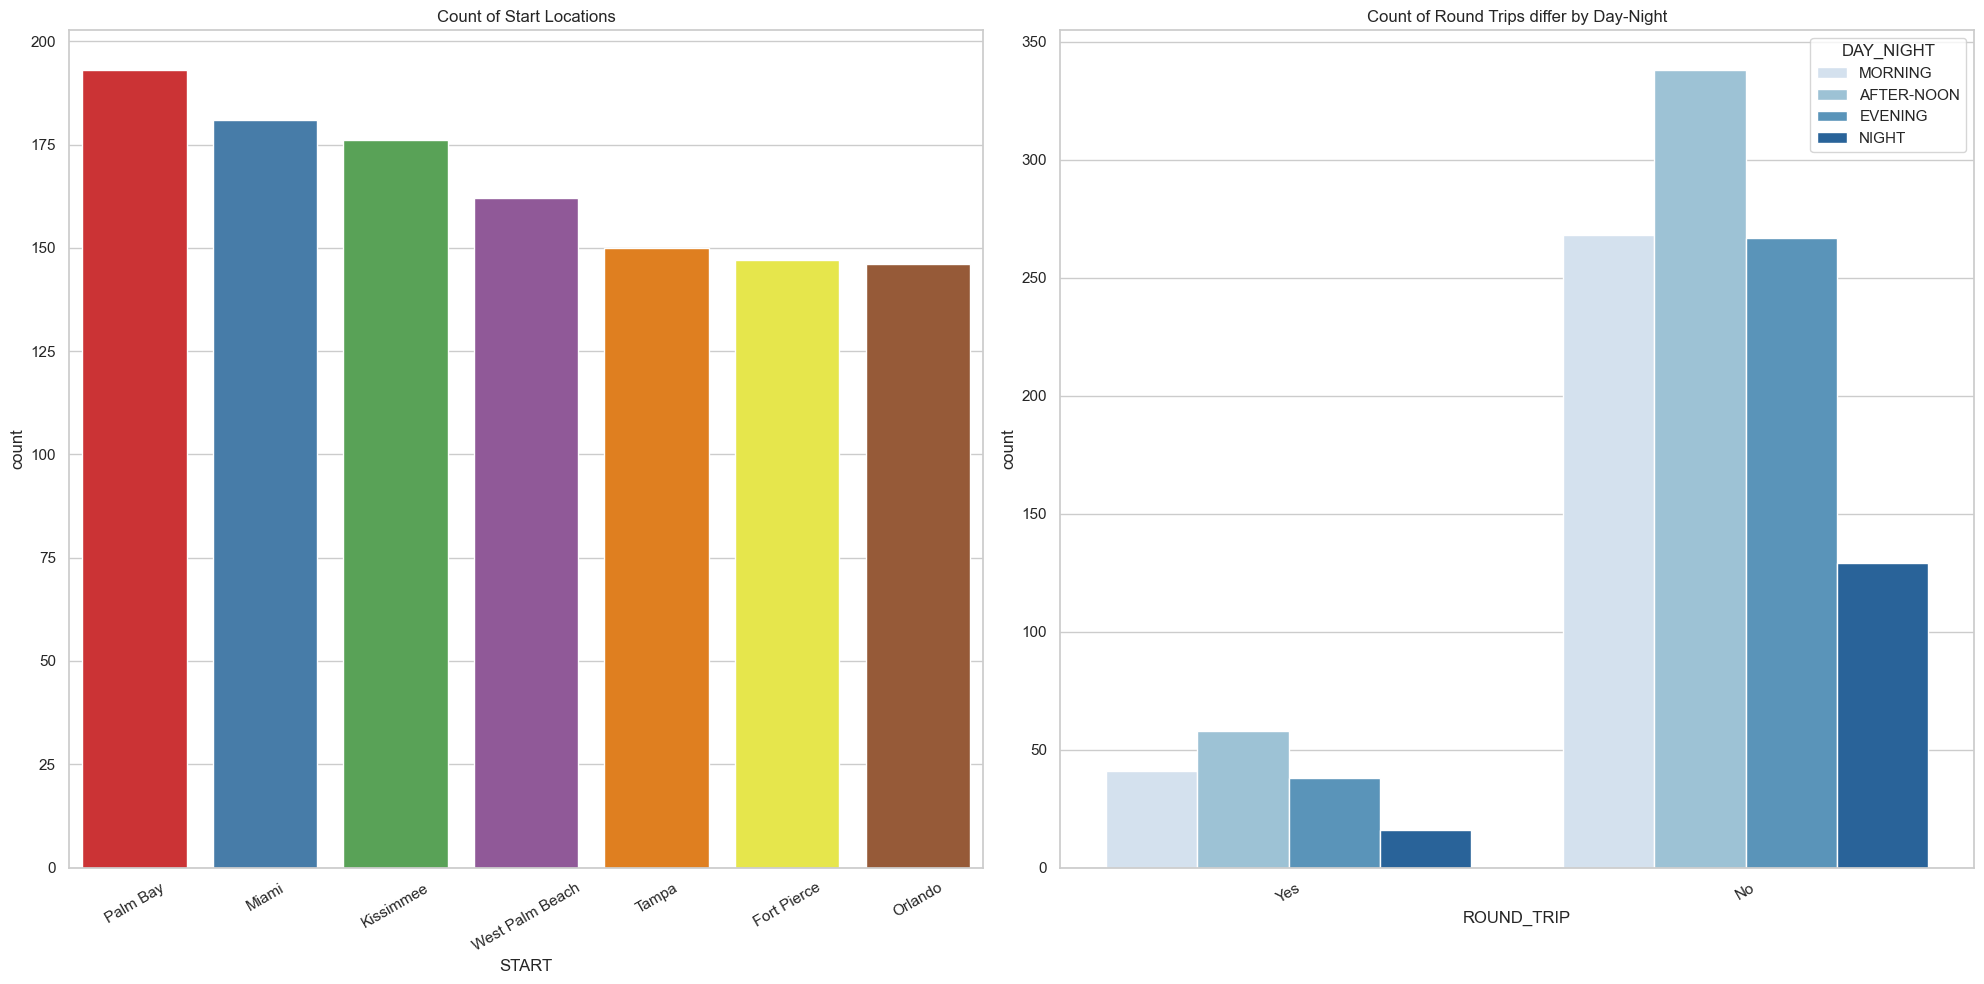



---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------


--------------------------HEAT MAP--------------------------


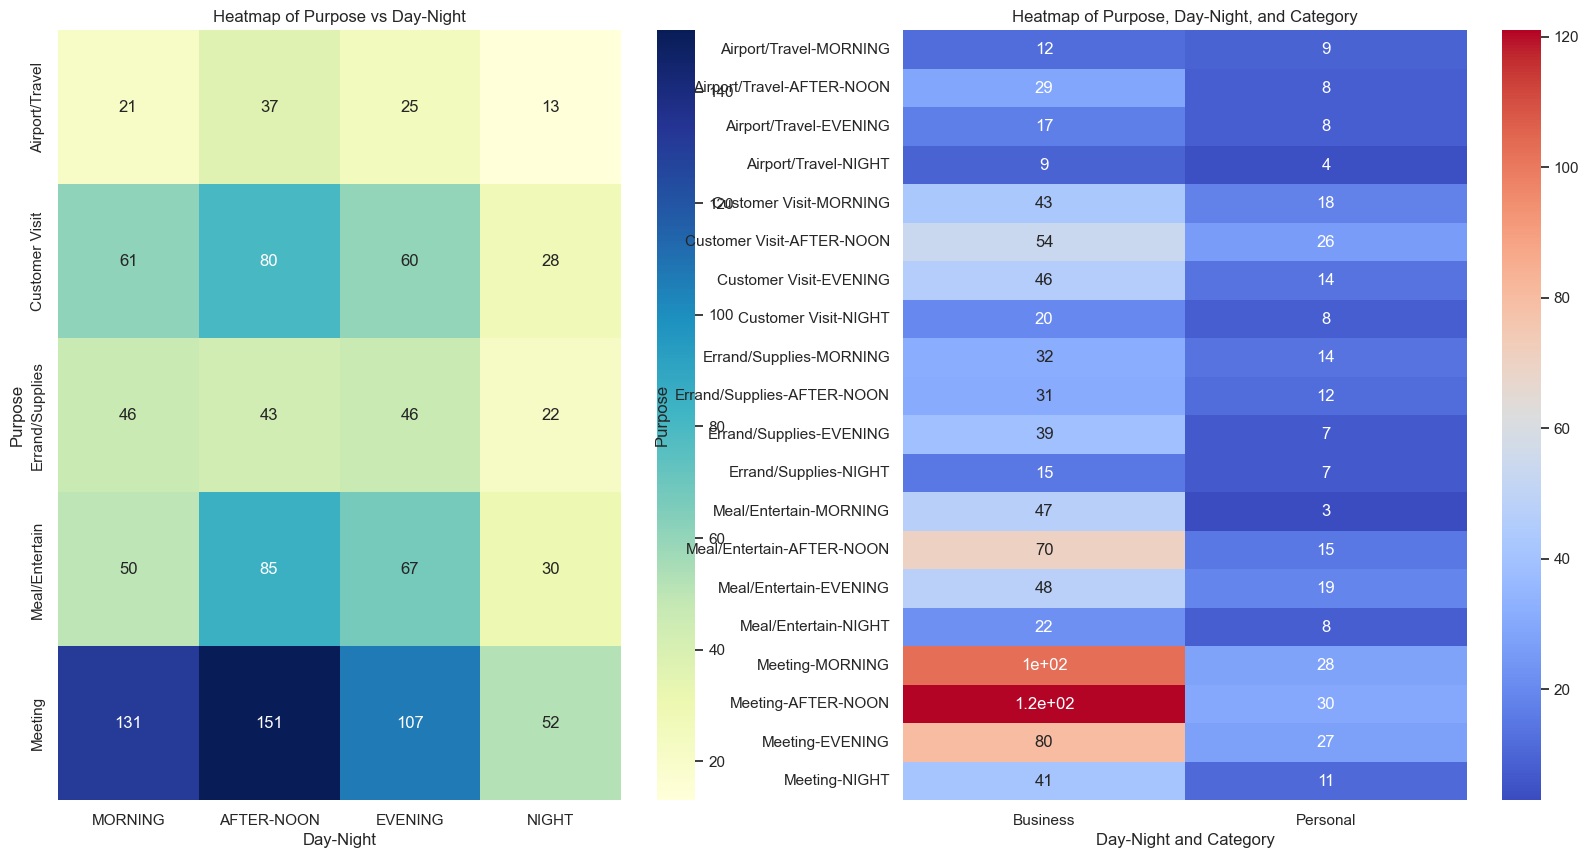



--------------------------BOX PLOT & VIOLIN PLOT--------------------------


<Figure size 2000x1000 with 0 Axes>

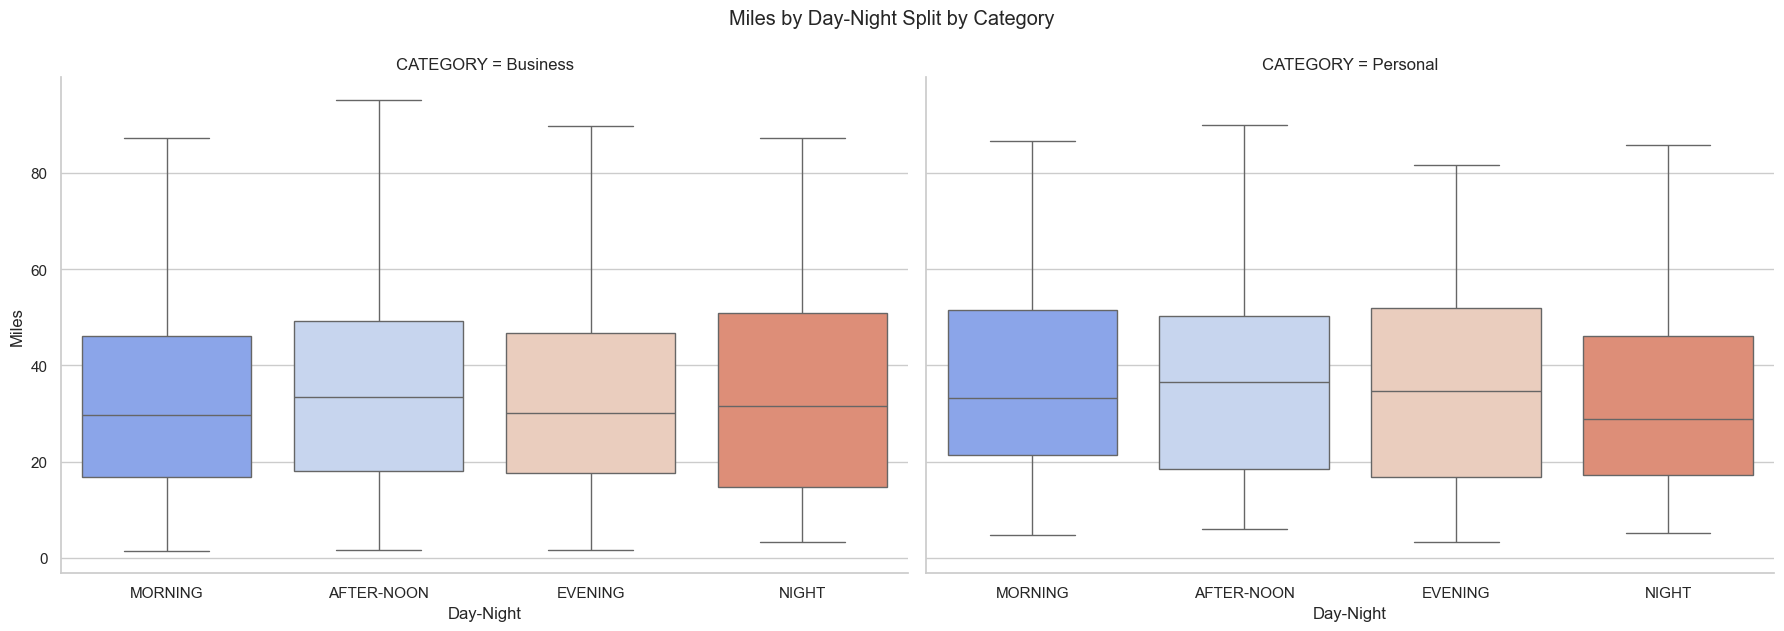

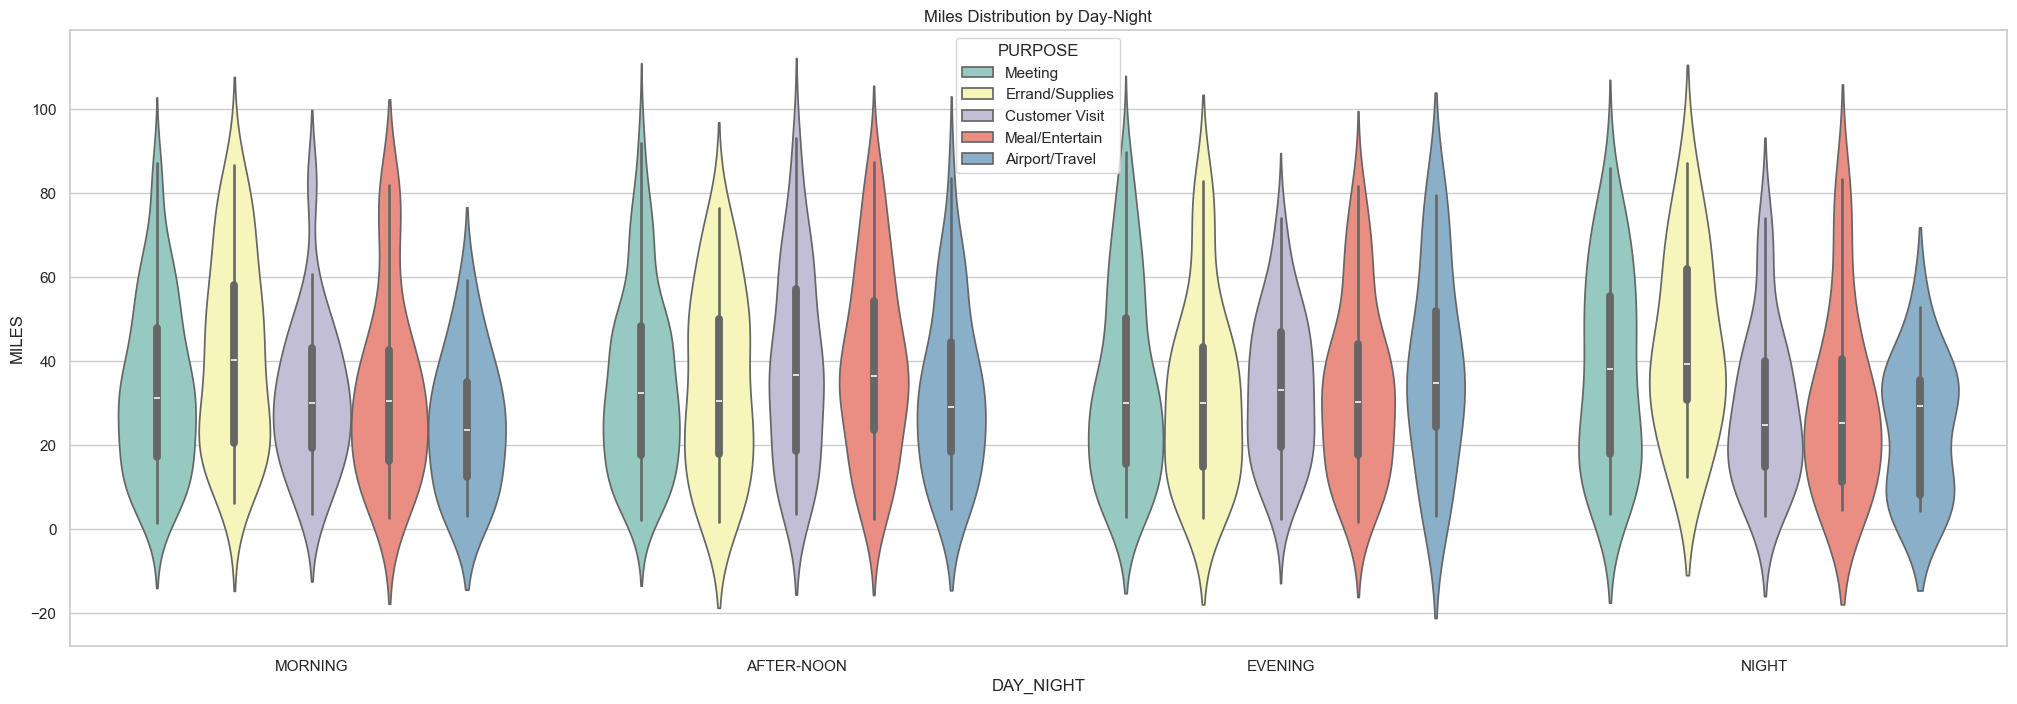



--------------------------SCATTER PLOT & LINE PLOT--------------------------


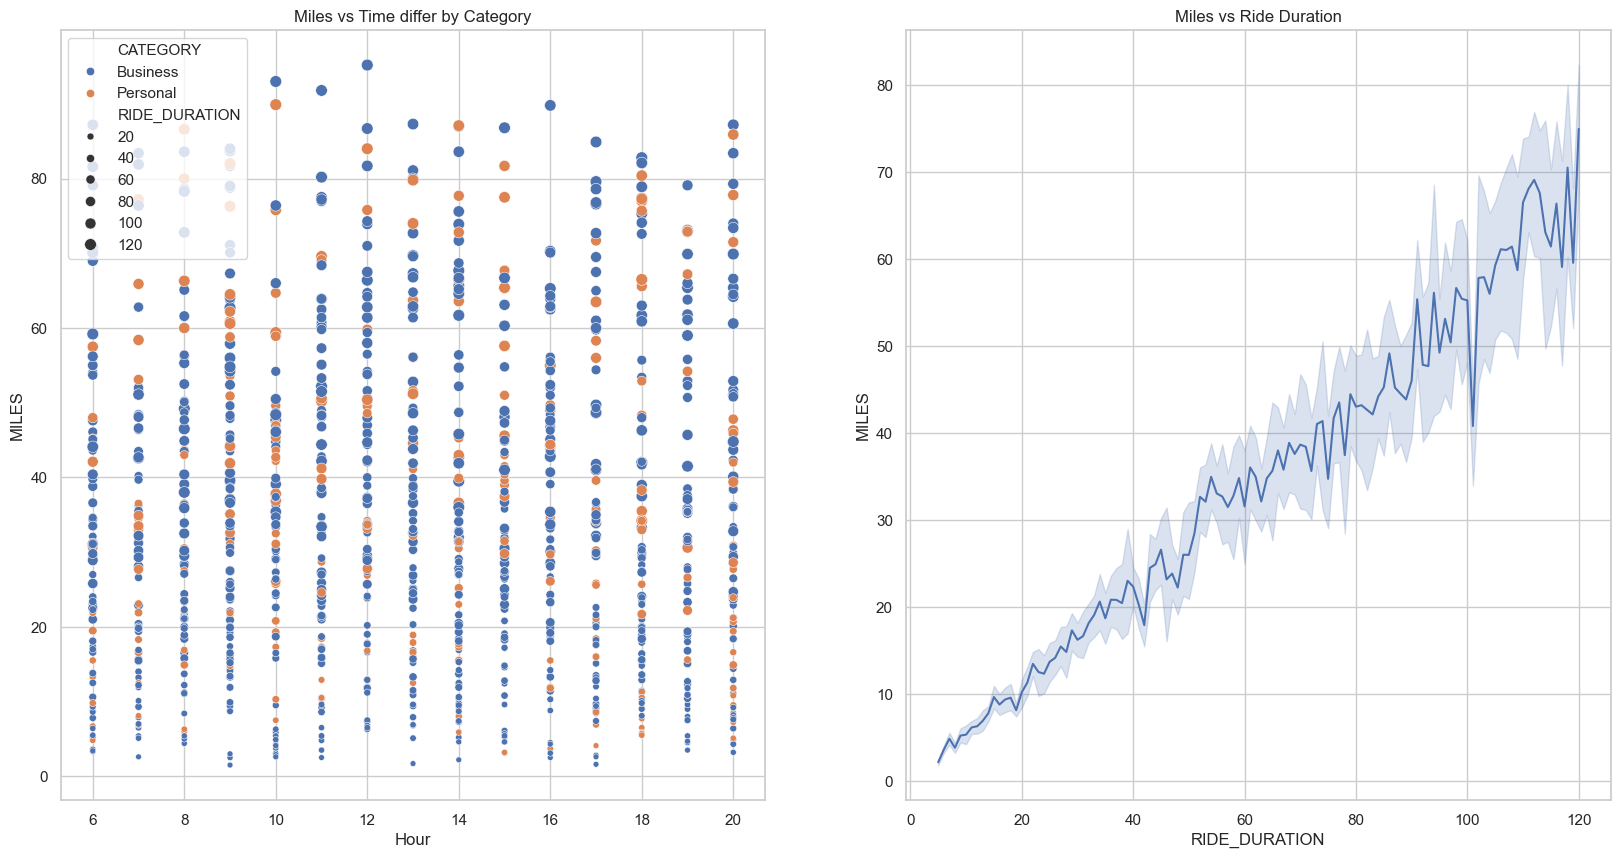



--------------------------BOX PLOT--------------------------


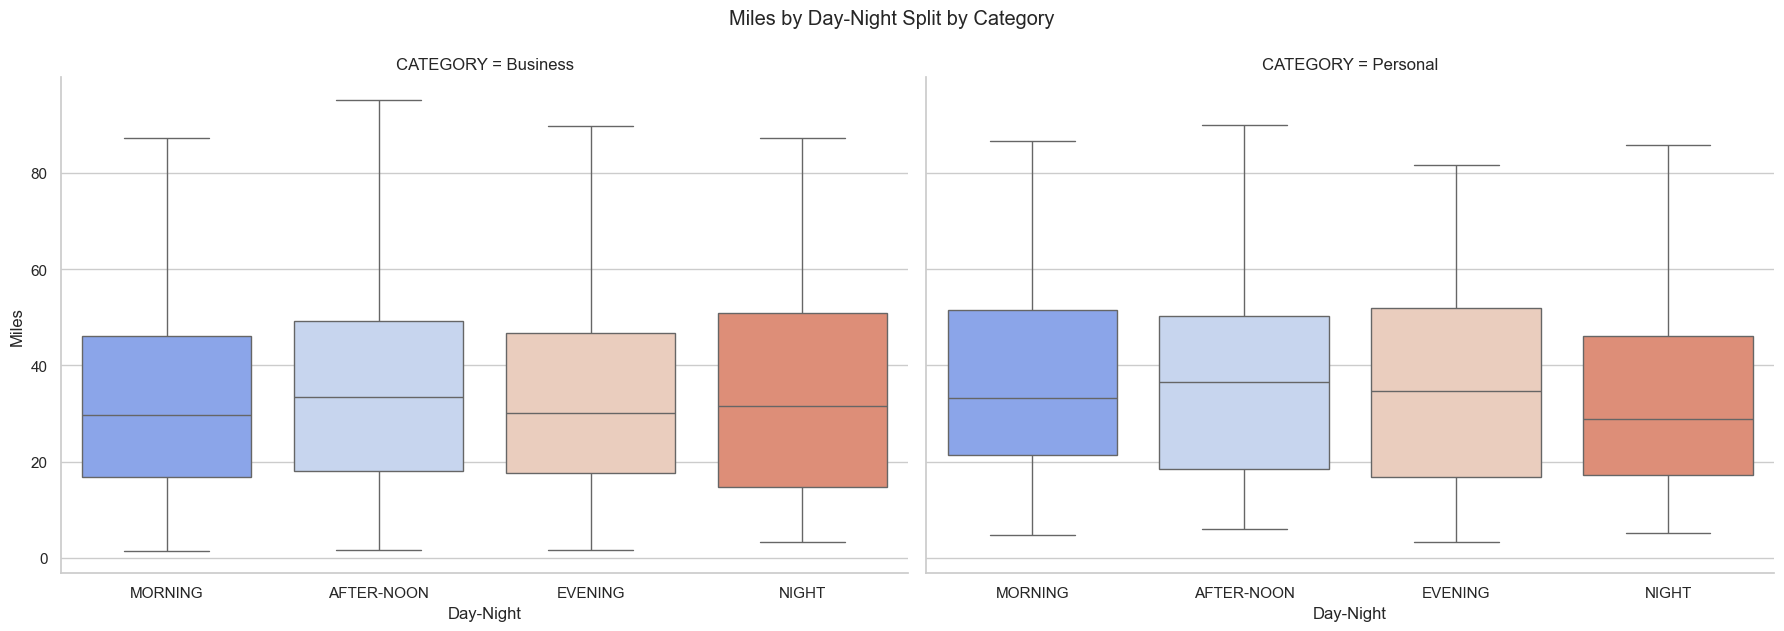



--------------------------BAR PLOT--------------------------


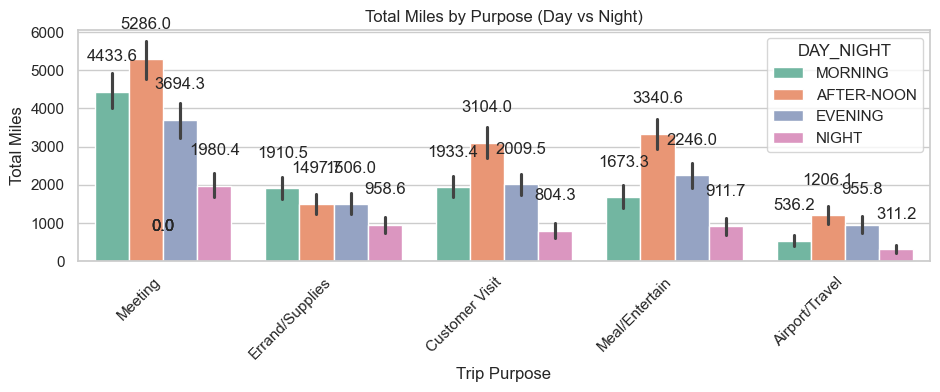



--------------------------SWARM PLOT--------------------------


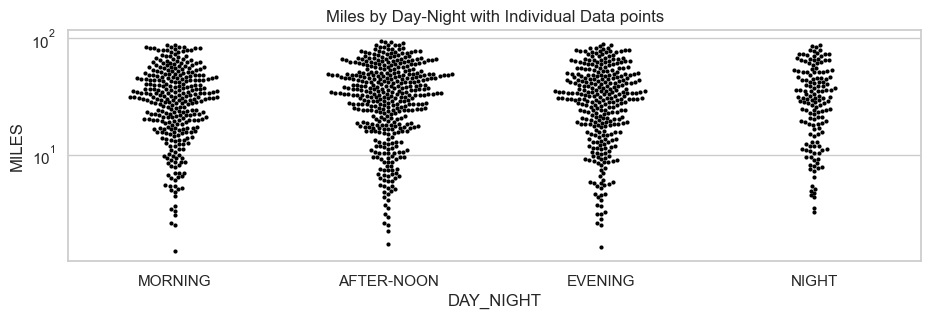

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

pd.set_option('display.max_colwidth', 2143)
pd.set_option('display.precision', 3)
pd.set_option('display.expand_frame_repr', False)


df = pd.read_excel("Uber_Ride_Analysis_Dataset.xlsx")
uber=pd.DataFrame()

df.columns = df.columns.str.replace('-','_',regex = False).str.replace('*','',regex = False).str.upper().str.strip()

df.drop_duplicates(inplace=True)

print("--------------------------FIRST 8 ROWS of DATASET--------------------------\n")
print(df.head(8))

print("\n\n--------------------------LAST 3 ROWS of DATASET--------------------------\n")
print(df.tail(3))

print("\n\n--------------------------SHAPE of the DATASET (Rows, Columns)--------------------------\n")
print(df.shape)

print("\n\n--------------------------DATASET INFORMATION--------------------------\n")
df.info()

print("\n\n--------------------------STATISTICAL SUMMARY--------------------------\n")
print(df.describe(include='all'))

print("\n\n--------------------------MISSING VALUES in DATASET--------------------------\n")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\n\n--------------------------MISSING VALUES after HANDLING--------------------------\n")
print(df.isnull().sum())

print("\n\n---------------------------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------------------------")

uber['START_DATE'] = pd.to_datetime(df['START_DATE'], format = "%d-%m-%Y %H:%M", errors='coerce')
uber['END_DATE'] = pd.to_datetime(df['END_DATE'], format = "%d-%m-%Y %H:%M", errors='coerce')

df['START_TIME'] = pd.DatetimeIndex(uber["START_DATE"]).time
df['END_TIME'] = pd.DatetimeIndex(uber["END_DATE"]).time
df['START_DATE'] = pd.DatetimeIndex(uber["START_DATE"]).date
df['END_DATE'] = pd.DatetimeIndex(uber["END_DATE"]).date


uber['Hour']=pd.DatetimeIndex(uber["START_DATE"]).hour
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'])
uber['WEEKDAY'] = uber['START_DATE'].dt.day_name()
uber['TIME'] = uber['START_DATE'].dt.time
uber['MONTH'] = pd.DatetimeIndex(uber['START_DATE']).month

month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
uber['MONTH'] = uber['MONTH'].map(month_dict)

bins = [0, 10, 15, 19, 24]
labels = ['MORNING', 'AFTER-NOON', 'EVENING', 'NIGHT']
df['DAY_NIGHT'] = pd.cut(uber['Hour'], bins=bins, labels=labels, right=False)

df['RIDE_DURATION']=(uber['END_DATE']-uber['START_DATE']).dt.total_seconds()/60


object_cols = list(df.select_dtypes(include=[object]).columns)
unique_values = {}
for col in object_cols:
    unique_values[col] = df[col].nunique()

def round(x):
    if x['START'] == x['STOP']:
        return 'Yes'
    else:
        return 'No'
df['ROUND_TRIP'] = df.apply(round, axis=1)

df['FARE'] = (df['MILES']*11).round(2)

ORDER = ['START_DATE', 'START_TIME', 'START', 'STOP', 'END_DATE', 'END_TIME', 'RIDE_DURATION', 'MILES', 'FARE', 'DAY_NIGHT', 'PURPOSE', 'ROUND_TRIP', 'CATEGORY']
df = df[ORDER]


print("\n\n-------------------------- DATASET after ANALYSIS --------------------------\n\n")
print(df)

print("\n\nUNIQUE VALUES in each COLUMN :",unique_values)

print("\n\n--------------------------SHAPE of the DATASET (Rows, Columns)--------------------------\n")
print(df.shape)

print("\n\n--------------------------DATASET INFORMATION--------------------------\n")
print(df.info())

print("\n\n--------------------------STATISTICAL SUMMARY--------------------------\n")
print(df.describe(include='all'))

print("\n\n---------------------------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------------------------")

print("\n\n-------------------------------------------------------------DATA VISUALISATION----------------------------------------------------------")
print("\n\n---------------------------------------- No. of Rides Across Time, Weekday, Month -------------------------------------------\n\n")



sorted_time_counts = uber['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ax = sns.countplot(data=uber, x='Hour', order=sorted_time_counts.index, palette='rocket')
plt.title("Rides by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()


sorted_week_counts = uber['WEEKDAY'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ax = sns.countplot(data=uber, x='WEEKDAY', order=sorted_week_counts.index, palette='Paired')
plt.title("Rides Across Weekdays")
plt.xlabel("Weekdays")
plt.ylabel("Number of Rides")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()


sorted_month_counts = uber['MONTH'].value_counts().sort_index()

plt.figure(figsize=(10,6))
ax = sns.countplot(data=uber, x='MONTH', order=sorted_month_counts.index, palette='magma')
plt.title("Rides Across Months")
plt.xlabel("Months")
plt.ylabel("Number of Rides")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()


print("\n\n--------------------------COUNT PLOTS--------------------------")

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='CATEGORY', hue='DAY_NIGHT', palette='Set2')
plt.xticks(rotation=30)
plt.title("Count of Categories differ by Day-Night")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='PURPOSE', palette='Set3')
plt.xticks(rotation=30)
plt.title("Count of Purposes")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x='START', data=df, order=df['START'].value_counts().iloc[:10].index, palette='Set1')
plt.xticks(rotation=30)
plt.title("Count of Start Locations")

plt.subplot(1, 2, 2)
sns.countplot(x='ROUND_TRIP', data= df, hue = 'DAY_NIGHT', palette='Blues')
plt.xticks(rotation=30)
plt.title("Count of Round Trips differ by Day-Night")
plt.tight_layout()
plt.show()


print("\n\n---------------------------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------------------------")

print("\n\n--------------------------HEAT MAP--------------------------")

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
heatmap_data = df.groupby(['PURPOSE', 'DAY_NIGHT']).size().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap of Purpose vs Day-Night")
plt.xlabel("Day-Night")
plt.ylabel("Purpose")

plt.subplot(1, 2, 2)
heatmap_data = df.groupby(['PURPOSE', 'DAY_NIGHT', 'CATEGORY']).size().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title("Heatmap of Purpose, Day-Night, and Category")
plt.xlabel("Day-Night and Category")
plt.ylabel("Purpose")
plt.show()

print("\n\n--------------------------BOX PLOT & VIOLIN PLOT--------------------------")

plt.figure(figsize=(20, 10))
g = sns.FacetGrid(df, col='CATEGORY', height=6, aspect=1.5)
g.map(sns.boxplot, 'DAY_NIGHT', 'MILES', palette='coolwarm', showfliers=True, fliersize=8)
g.set_axis_labels('Day-Night', 'Miles')
g.fig.suptitle('Miles by Day-Night Split by Category', y=1.05)
plt.show()

plt.figure(figsize=(25, 8))
sns.violinplot(data=df, x='DAY_NIGHT', y='MILES', hue='PURPOSE', palette='Set3')
plt.title('Miles Distribution by Day-Night')
plt.show()

print("\n\n--------------------------SCATTER PLOT & LINE PLOT--------------------------")

cdf=pd.concat([df,uber])
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(data=cdf, x='Hour', y='MILES', hue='CATEGORY', size='RIDE_DURATION')
plt.title('Miles vs Time differ by Category')

plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='RIDE_DURATION', y='MILES')
plt.title('Miles vs Ride Duration')
plt.show()

print("\n\n--------------------------BOX PLOT--------------------------")

g = sns.FacetGrid(df, col='CATEGORY', height=6, aspect=1.5)
g.map(sns.boxplot, 'DAY_NIGHT', 'MILES', palette='coolwarm', showfliers=True, fliersize=8)
g.set_axis_labels('Day-Night', 'Miles')
g.fig.suptitle('Miles by Day-Night Split by Category', y=1.05)
plt.show()

print("\n\n--------------------------BAR PLOT--------------------------")

plt.figure(figsize=(11, 3))
ax = sns.barplot(data=df,x='PURPOSE',y='MILES',hue='DAY_NIGHT',estimator=sum, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Total Miles by Purpose (Day vs Night)')
plt.xlabel('Trip Purpose')
plt.ylabel('Total Miles')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', xytext=(0, 20), textcoords='offset points')
plt.show()

print("\n\n--------------------------SWARM PLOT--------------------------")

plt.figure(figsize=(11, 3))
sns.swarmplot(data=df, x='DAY_NIGHT', y='MILES', color='black', size=3)
plt.title('Miles by Day-Night with Individual Data points')
plt.yscale('log')
plt.show()



pd.reset_option('all')
df.to_csv("Uber_Ride.csv")